In [1]:

%load_ext autoreload
%autoreload 2


In [3]:
import hls4ml

In [4]:
config = hls4ml.utils.fetch_example_model('garnet_1layer.json')

# You can print the configuration to see some default parameters
print(config)

In [5]:
# Convert it to a hls project
hls_model = hls4ml.converters.keras_to_hls(config)

In [6]:

hls_model.build()


#hls4ml.utils.fetch_example_list()

#how should I install vivado?

Writing HLS project
Done


Exception: Vivado HLS installation not found. Make sure "vivado_hls" is on PATH.

In [3]:

data_path = '/fast_scratch_1/atlas_images/v01-45/'

cell_geo_path = data_path + 'cell_geo.root'

out_path = '/home/joshualerner/start_tf/PionReconstruction/data/'

test_file_list = ([[data_path + f'pi0/user.angerami.24559740.OutputStream._000{i:03d}.root', 1] for i in range(232, 264)],
                  [[data_path + f'pipm/user.angerami.24559744.OutputStream._000{i:03d}.root', 0] for i in range(232, 264)])



test_generator = garnetDataGenerator(test_file_list,
                                     cell_geo_path,
                                     batch_size=20000,
                                     labeled=True,
                                     preprocess=preprocess,
                                     output_dir=out_path + 'test/')


In [4]:
import uproot as ur

with ur.open(data_path + 'pi0/user.angerami.24559740.OutputStream._000232.root') as file:
    pi0_data = file['EventTree'].arrays(library='ak')
with ur.open(data_path + 'pipm/user.angerami.24559744.OutputStream._000232.root') as file:
    pipm_data = file['EventTree'].arrays(library='ak')


In [10]:
import numpy as np
import awkward as ak

for val in ['cluster_ENG_CALIB_TOT', 'cluster_E', 'cluster_cell_E']:
    print(val + ': ' + str(np.min(ak.flatten(pipm_data[val]))) + ' - ' + str(np.max(ak.flatten(pipm_data[val]))))


cluster_ENG_CALIB_TOT: 0.0 - 1943.4852
cluster_E: 5.0899984e-05 - 1978.5361
cluster_cell_E: 0.005000187084078789 - 1551.0838623046875


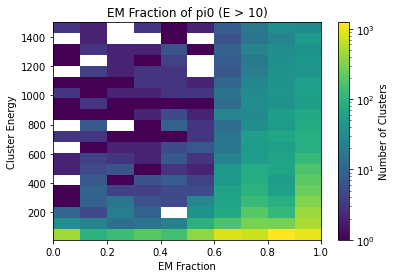

In [95]:
en = 10

hh = plt.hist2d(np.array(ak.flatten(pi0_data['cluster_EM_PROBABILITY'])), 
                np.array(ak.flatten(pi0_data['cluster_E'])),
                bins=(10, 20),
                norm=LogNorm(),
                range=((0, 1), (en, 1500)))
plt.colorbar(hh[3], label='Number of Clusters')
plt.xlabel('EM Fraction')
plt.ylabel('Cluster Energy')
plt.title(f'EM Fraction of pi0 (E > {en})')
plt.show()

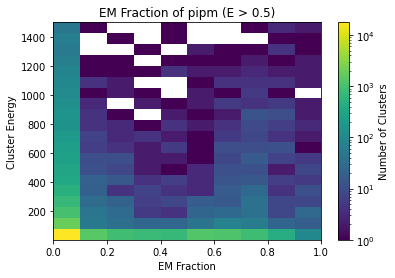

In [94]:

hh = plt.hist2d(np.array(ak.flatten(pipm_data['cluster_EM_PROBABILITY'])), 
                np.array(ak.flatten(pipm_data['cluster_E'])),
                bins=(10, 20),
                norm=LogNorm(),
                range=((0, 1), (en, 1500)))
plt.colorbar(hh[3], label='Number of Clusters')
plt.xlabel('EM Fraction')
plt.ylabel('Cluster Energy')
plt.title(f'EM Fraction of pipm (E > {en})')
plt.show()

In [86]:
x = np.array(ak.flatten(pi0_data['cluster_E']))
y = np.array(ak.flatten(pi0_data['cluster_ENG_CALIB_TOT']))

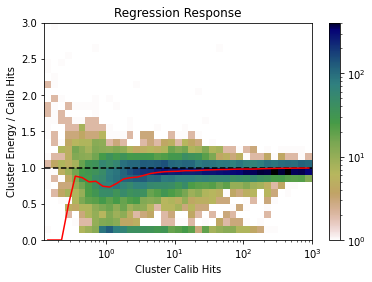

In [87]:
reg = Plotter(regResponse, 
              pred=y, 
              target=x,
              normalized=False)
reg.show()

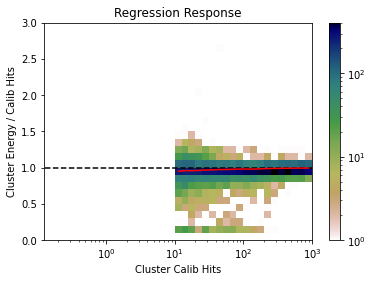

In [88]:
reg = Plotter(regResponse, 
              pred=y[x > 10], 
              target=x[x > 10],
              normalized=False)
reg.show()

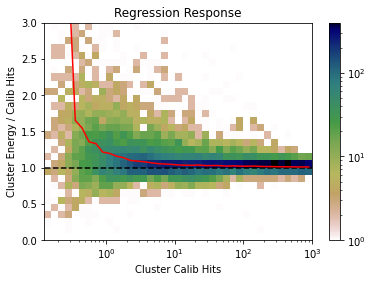

In [89]:

reg = Plotter(regResponse, 
              pred=x, 
              target=y,
              normalized=False)
reg.show()

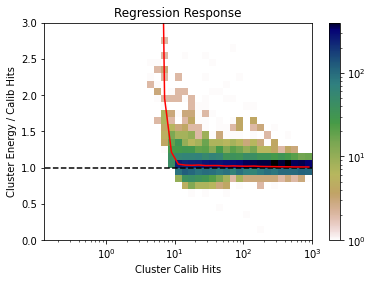

In [90]:
reg = Plotter(regResponse, 
              pred=x[x > 10], 
              target=y[x > 10],
              normalized=False)
reg.show()

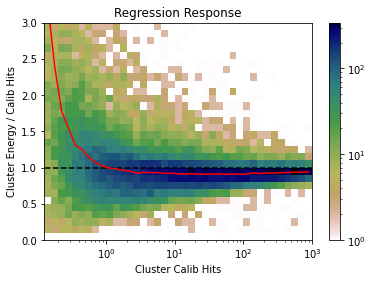

In [83]:
reg = Plotter(regResponse, 
              pred=np.array(ak.flatten(pipm_data['cluster_E'])), 
              target=np.array(ak.flatten(pipm_data['cluster_ENG_CALIB_TOT'])),
              normalized=False)
reg.show()